In [ ]:
### Trading ML is a software to track option market and advise the strategy 
### according to several features including volume trend, open interest trend, delta
### it also back trace option strategy performance via stored data

## FINNHUB API USAGE 

In [1]:
import requests as requests
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date as date
from finnhub_api import Finnapi as Finnapi
from tda_api import Td
from ipywidgets import widgets

In [2]:
def any_non_type(item, list_of_attr):
    for l in list_of_attr:
        if (item[l] is None):
            return True
    return False

In [3]:
def convertAttrToFloat(item, list_of_attr):
    r = item
    for l in list_of_attr:
        r[l] = np.float(item[l])
    return r

In [4]:
def filter_options(res, expiration_date, option_type, strike_low, strike_high, openInterest_min, volume_min):
    s_list = [] 
    oi_list = []
    v_list = []
    p_list = []
    b_list = []
    a_list = []
    for item in res['data']:
        if (expiration_date == None or item['expirationDate'] == expiration_date):
            ## option_type can be 'CALL' or 'PUT'
            ops = item['options'][option_type]
            for o in ops:
                if (any_non_type(o, ['strike', 'volume', 'openInterest', 'bid', 'ask', 'lastPrice'])):
                    continue
                o = convertAttrToFloat(o, ['strike', 'volume', 'openInterest', 'bid', 'ask', 'lastPrice'])
                s = np.float(o['strike']) 
                if (( s>= strike_low) and s <= strike_high and
                    o['openInterest'] > openInterest_min and  o['volume'] > volume_min):
        
                    s_list.append(s)
                    oi_list.append(o['openInterest'])
                    v_list.append(o['volume'])
                    p_list.append(o['lastPrice'])
                    b_list.append(o['bid'])
                    a_list.append(o['ask'])
    return(s_list, oi_list, v_list, p_list, b_list, a_list)
    
        

In [5]:
f = Finnapi('bmrl2rnrh5rakeigdikg', 2)
f.curr_symbol = 'MCD'

In [6]:
response = f.getOptionChain()

Getting option chain for symbol MCD


In [7]:
print(response)

{'code': 'MCD', 'exchange': 'US', 'data': [{'expirationDate': '2019-11-08', 'options': {'CALL': [{'contractName': 'MCD191108C00157500', 'contractSize': 'REGULAR', 'currency': 'USD', 'type': 'CALL', 'inTheMoney': 'FALSE', 'lastTradeDateTime': '2019-10-31 13:02:19', 'expirationDate': '2019-11-08', 'strike': '157.5000', 'lastPrice': '39.0500', 'bid': '36.1000', 'ask': '37.3000', 'change': '39.0500', 'changePercent': None, 'volume': 1, 'openInterest': 1, 'impliedVolatility': '74.1516', 'delta': '0.9999', 'gamma': '0.0000', 'theta': '-0.0106', 'vega': '0.0000', 'rho': '0.0086', 'theoretical': '36.7000', 'intrinsicValue': '0.0000', 'timeValue': '0.0000', 'updatedAt': '2019-11-06 18:55:16'}, {'contractName': 'MCD191108C00160000', 'contractSize': 'REGULAR', 'currency': 'USD', 'type': 'CALL', 'inTheMoney': 'FALSE', 'lastTradeDateTime': '0000-00-00 00:00:00', 'expirationDate': '2019-11-08', 'strike': '160.0000', 'lastPrice': None, 'bid': '33.2500', 'ask': '35.1000', 'change': '0.0000', 'changePe

In [8]:
(s_list, oi_list, v_list, p_list, b_list, a_list) = filter_options(response, '2019-11-15', 'PUT', 185, 210, 0, 0)

2019-11-06


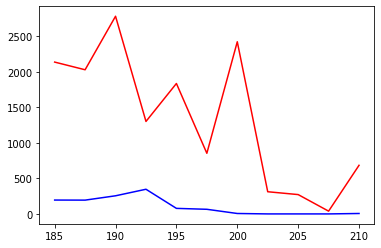

In [9]:
print(date.today())
plt.plot(np.array(s_list), np.array(oi_list), color='r')
plt.plot(np.array(s_list), np.array(v_list), color='b')

In [10]:
(s_list, oi_list, v_list,p_list, b_list, a_list) = filter_options(response, '2019-11-15', 'PUT', 185, 210, 100, 0)
(s_list_f, oi_list_f, v_list_f,p_list_f, b_list_f, a_list_f) = filter_options(response, '2019-12-20', 'PUT', 185, 210, 100, 0)

[185.0, 187.5, 190.0, 192.5, 195.0, 197.5, 200.0, 202.5, 205.0, 210.0]


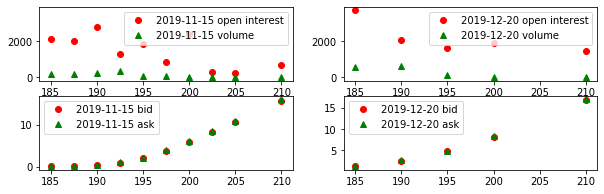

In [11]:

f = plt.figure(figsize=(10,3))
ax = f.add_subplot(221)
ax2 = f.add_subplot(222, sharex=ax, sharey=ax)
ax3 = f.add_subplot(2,2,3)
ax4 = f.add_subplot(2,2,4)
print(s_list)
ax.plot(np.array(s_list), np.array(oi_list), 'ro', label="2019-11-15 open interest")
ax.plot(np.array(s_list), np.array(v_list), 'g^', label= '2019-11-15 volume')
ax.legend()
ax2.plot(np.array(s_list_f), np.array(oi_list_f), 'ro', label='2019-12-20 open interest')
ax2.plot(np.array(s_list_f), np.array(v_list_f), 'g^', label='2019-12-20 volume')
ax2.legend()
ax3.plot(np.array(s_list), np.array(b_list), 'ro', label='2019-11-15 bid')
ax3.plot(np.array(s_list), np.array(a_list), 'g^', label='2019-11-15 ask')
ax3.legend()
ax4.plot(np.array(s_list_f), np.array(b_list_f), 'ro', label='2019-12-20 bid')
ax4.plot(np.array(s_list_f), np.array(a_list_f), 'g^', label='2019-12-20 ask')
ax4.legend()

In [12]:
## TD Ameritrade API USAGE

In [13]:
td = None

In [14]:
def getOpts(user, secrete, option_parameters):
    td = Td.init(user, secrete)
    return(td.get_option_chain(option_parameters))

In [15]:
def displayTdaOptions(df):
    print(df)
    exp_date = np.unique(df.expiration)
    print("all_exp_date", exp_date)
    colorcodeV = ['k*-', 'k^-', 'ko-', 'k^-', 'k--', 'k^-', 'ko-', 'k.-']
    colorcodeOI = ['g--', 'b-', 'r--', 'g--', 'g.-', 'g^-', 'g.-', 'g^-']
    i = 0
    j = 0
    num_subplots = exp_date.size
    ncol = 2
    nrow = np.int(np.floor(num_subplots/2))
    fig, ax = plt.subplots(nrow,2, figsize=(30,15))
    e = exp_date[0]
    for i in list(range(0,nrow)):
        for j in list(range(0,ncol)):
            c1 = colorcodeV[i]
            c2 = colorcodeOI[i]
            if nrow == 1:
                ax[j].plot(df[df['expiration'] == e].strike, df[df['expiration']==e].totalVolume, c1, label='exp_date' + e + ' vol')
                ax[j].plot(df[df['expiration'] == e].strike, df[df['expiration']==e].openInterest, c2, label='exp_date' + e + ' oi')
                ax[j].legend()
            else:
                ax[i][j].plot(df[df['expiration'] == e].strike, df[df['expiration']==e].totalVolume, c1, label='exp_date' + e + ' vol')
                ax[i][j].plot(df[df['expiration'] == e].strike, df[df['expiration']==e].openInterest, c2, label='exp_date' + e + ' oi')
                ax[i][j].legend()
                ax[i][j].legend()
            j = j + 1
            if j < 2:
                e = exp_date[ncol*i + j]
            
        i = i + 1

Text(value='', description='user')

Password(description='Password:', placeholder='Make it long!')

Button(description='submit', style=ButtonStyle())

clicked
user janettsai01
getting options, parameters: {'symbol': 'GDDY', 'contractType': 'CALL', 'strikeCount': 6, 'strike': 65, 'monthIncrement': 2, 'interested_columns': ['expiration', 'strike', 'totalVolume', 'openInterest', 'last', 'bid', 'ask', 'highPrice', 'lowPrice'], 'monthlyOption': True}
       expiration strike  totalVolume  openInterest  last   bid   ask  \
0    2019-11-15:9   57.5          1.0           1.0  6.50  6.20  7.60   
1    2019-11-15:9   60.0        129.0          47.0  4.90  4.70  5.10   
2    2019-11-15:9   62.5        385.0          83.0  3.37  3.20  3.50   
3    2019-11-15:9   65.0        283.0        1569.0  2.17  2.10  2.30   
4    2019-11-15:9   67.5        464.0         997.0  1.30  1.30  1.45   
5    2019-11-15:9   70.0        201.0         107.0  0.85  0.75  0.95   
6   2019-12-20:44   57.5          1.0           0.0  7.10  7.10  7.70   
7   2019-12-20:44   60.0         51.0           4.0  5.34  5.40  5.80   
8   2019-12-20:44   62.5        138.0       

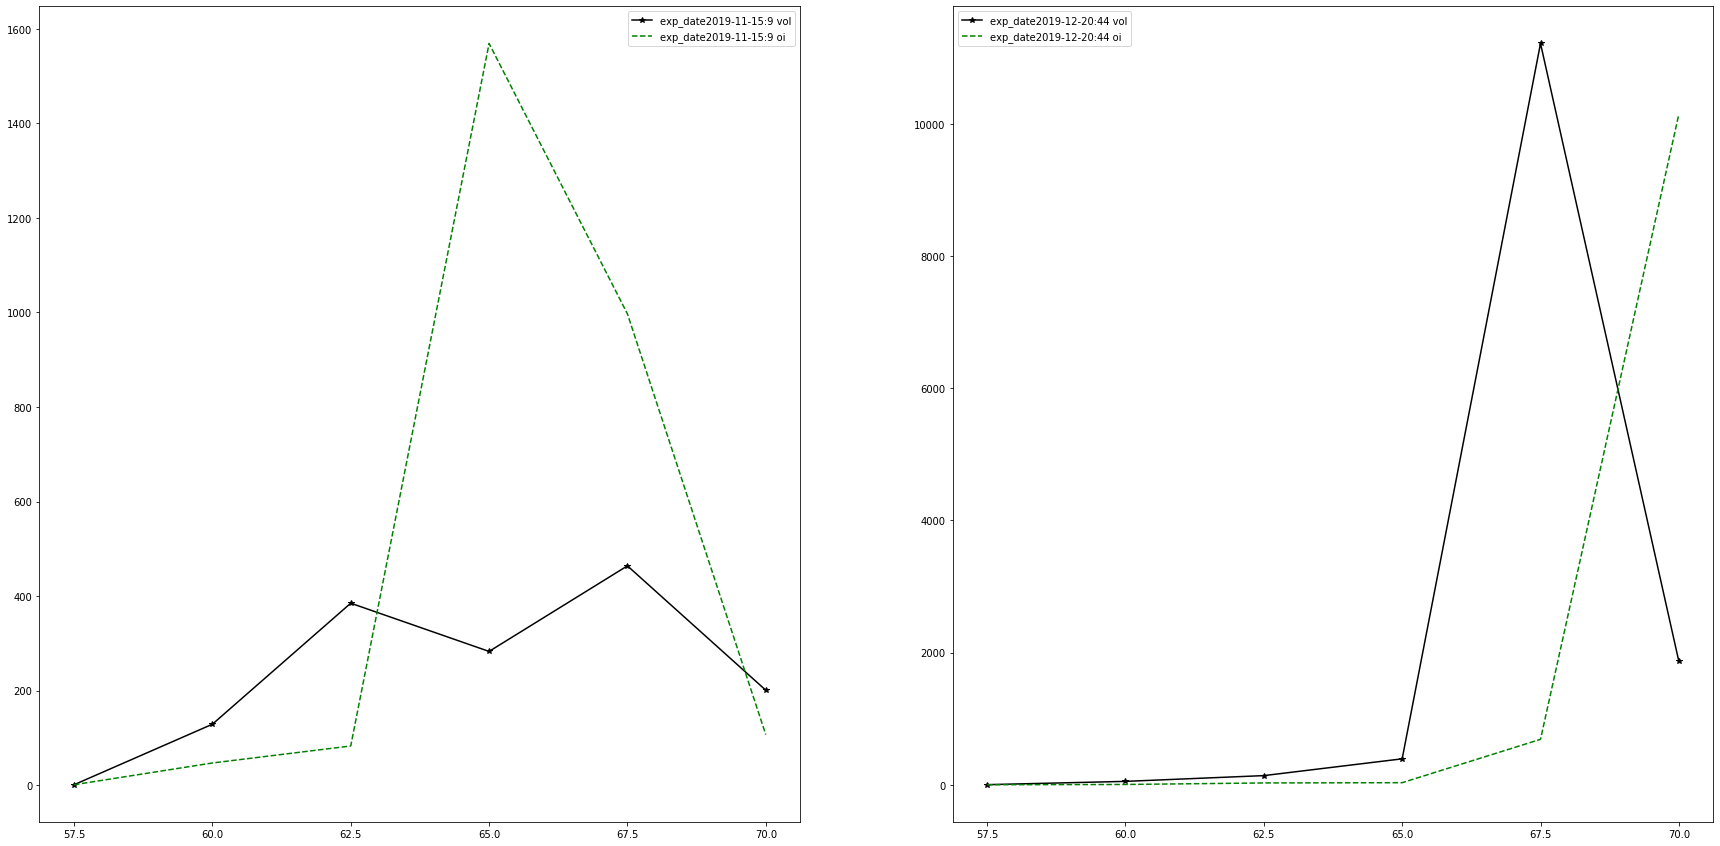

In [16]:
##### from ipywidgets import widgets
text_user = widgets.Text(description="user")
display(text_user)
text_pass = widgets.Password(description='Password:', placeholder='Make it long!')
display(text_pass)
submit = widgets.Button(description="submit")
display(submit)
output = widgets.Output()
user = ''
secrete = ''

option_parameters = {"symbol": 'GDDY', "contractType": 'CALL', "strikeCount": 6, 
                     "strike": 65, "monthIncrement":2, 
                     "interested_columns": ['expiration', 'strike','totalVolume', 'openInterest', 'last', 'bid', 'ask', 'highPrice', 'lowPrice'],
                     "monthlyOption": True}
def on_button_clicked(b):
    print("clicked")
    user = text_user.value
    print("user", user)
    secrete = text_pass.value
    df = getOpts(user, secrete, option_parameters)
    displayTdaOptions(df)
submit.on_click(on_button_clicked)

In [17]:
option_parameters = {"periodType": 'year',"frequencyType": 'daily', "period":5, "frequency": 1}

In [18]:
td = Td.init(user, secrete)
df = td.get_price_history('GDDY', None, None, option_parameters)


In [19]:
print(df)

      close            datetime     high      low   open    volume
0     26.15 2015-04-01 05:00:00  26.8400  25.4900  26.15  23177384
1     26.50 2015-04-02 05:00:00  27.2700  25.8300  26.72   5166089
2     25.80 2015-04-06 05:00:00  26.7999  25.3500  26.72   2090996
3     25.24 2015-04-07 05:00:00  25.8500  25.1600  25.84    939392
4     25.15 2015-04-08 05:00:00  25.4800  25.0000  25.35    921678
5     26.32 2015-04-09 05:00:00  26.4700  25.0500  25.10    751643
6     25.29 2015-04-10 05:00:00  26.8000  25.0000  26.34    966330
7     25.37 2015-04-13 05:00:00  25.5900  25.1200  25.24    347103
8     25.80 2015-04-14 05:00:00  25.9000  25.2500  25.25    274632
9     25.12 2015-04-15 05:00:00  26.0500  25.0300  25.88    355281
10    24.78 2015-04-16 05:00:00  25.2500  24.5500  25.04   1111002
11    25.16 2015-04-17 05:00:00  25.6000  24.5000  24.55    493387
12    25.14 2015-04-20 05:00:00  25.4900  25.0400  25.19    322500
13    24.78 2015-04-21 05:00:00  25.2400  24.6400  25.18    53

C:\Users\Public\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


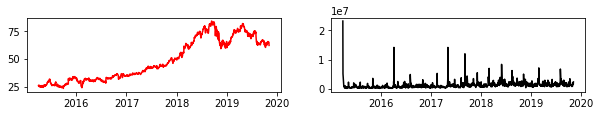

In [20]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(221)
ax.plot(df["datetime"], df["close"], color='r')
ax2 = f.add_subplot(222)
ax2.plot(df["datetime"], df["volume"], color='k')

In [21]:
curQuote = td.get_quotes('GDDY')
print(curQuote['GDDY']["lastPrice"])
print(curQuote['GDDY']["totalVolume"])
print(np.mean(df["volume"]), np.std(df["volume"]))

68.74
3189697
1234036.7428817947 1244736.1797804397


In [22]:
df = td.get_price_history('TSLA', None, None, option_parameters)
print(df)

       close            datetime      high       low    open    volume
0     230.97 2014-11-05 06:00:00  241.3600  230.5300  241.00   9045925
1     241.22 2014-11-06 06:00:00  246.6900  228.5000  234.49  15354717
2     240.20 2014-11-07 06:00:00  242.8399  237.2000  242.19   5161023
3     241.93 2014-11-10 06:00:00  242.8800  236.8000  239.11   4577208
4     251.08 2014-11-11 06:00:00  251.8200  242.0000  242.55   7952565
5     249.10 2014-11-12 06:00:00  252.3400  245.5800  249.75   5870818
6     251.70 2014-11-13 06:00:00  255.7500  250.2500  250.62   6236036
7     258.68 2014-11-14 06:00:00  258.8500  248.5000  250.00   6101145
8     253.98 2014-11-17 06:00:00  259.0000  252.0200  257.49   4025695
9     257.70 2014-11-18 06:00:00  259.9900  255.5100  255.86   4474294
10    247.74 2014-11-19 06:00:00  251.8800  245.6000  250.61   7918486
11    248.71 2014-11-20 06:00:00  250.9300  246.0000  247.71   3587220
12    242.78 2014-11-21 06:00:00  252.7800  242.1700  252.21   7485059
13    

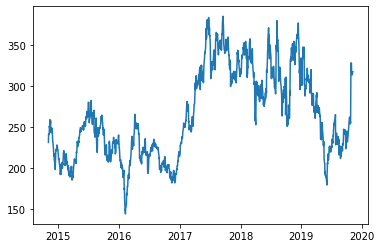

In [23]:
plt.plot(df["datetime"], df["close"])

In [24]:
## IBKR API USAGE

In [25]:
from ib_api import ibapi
import nest_asyncio
nest_asyncio.apply()

In [27]:
myIb = ibapi('127.0.0.1', 4001,847)
data = myIb.reqScannerOption()
symbols = []
for d in data:
    #print(d.contractDetails.contract.symbol)
    c = d.contractDetails.contract
    #genericTickers = "100,101,221"
    #p = myIb.reqMktPrice(c, genericTickers)
    symbols.append(d.contractDetails.contract.symbol)
myIb.disconnect()   

v_list = list()
p_list = list()
last_size = list()
for s in symbols:
    curQuote = td.get_quotes(s)[s]
    v_list.append(curQuote["totalVolume"])
    p_list.append(curQuote["lastPrice"])
    last_size.append(curQuote["regularMarketLastSize"])
hot_scanner_data = pd.DataFrame(data = {"symbol": symbols, "volume": v_list, "last_size": last_size})
print(hot_scanner_data)


2019-11-06 18:24:54,890 ib_insync.client INFO Connecting to 127.0.0.1:4001 with clientId 847...
2019-11-06 18:24:54,898 ib_insync.client INFO Connected
2019-11-06 18:24:54,913 ib_insync.client INFO Logged on to server version 152
2019-11-06 18:24:54,915 ib_insync.wrapper INFO Warning 2104, reqId -1: Market data farm connection is OK:usfuture
2019-11-06 18:24:54,916 ib_insync.wrapper INFO Warning 2104, reqId -1: Market data farm connection is OK:usfarm
2019-11-06 18:24:54,917 ib_insync.wrapper INFO Warning 2106, reqId -1: HMDS data farm connection is OK:euhmds
2019-11-06 18:24:54,919 ib_insync.wrapper INFO Warning 2106, reqId -1: HMDS data farm connection is OK:fundfarm
2019-11-06 18:24:54,920 ib_insync.wrapper INFO Warning 2106, reqId -1: HMDS data farm connection is OK:ushmds
2019-11-06 18:24:54,921 ib_insync.wrapper INFO Warning 2158, reqId -1: Sec-def data farm connection is OK:secdefil
2019-11-06 18:24:54,923 ib_insync.client INFO API connection ready
2019-11-06 18:24:54,939 ib_ins

in ib_api.connect


2019-11-06 18:24:55,365 ib_insync.wrapper ERROR Error 162, reqId 3: Historical Market Data Service error message:API scanner subscription cancelled: 3
2019-11-06 18:24:55,368 ib_insync.ib INFO Disconnecting from 127.0.0.1:4001, 267 B sent in 9 messages, 14.5 kB received in 265 messages, session time 483 ms.
2019-11-06 18:24:55,369 ib_insync.client INFO Disconnecting


   symbol     volume  last_size
0    BKLN    2184006       1145
1     HYG    9498129       7607
2     BBD   10921387       5115
3     KRE    4810748       1081
4     IEF    4129788       5505
5     XLB    3994317       1392
6    ITUB   22231710       5031
7     EWH    4152320        449
8      PE    8424082       4036
9     XLU   17771929          1
10    EFA   16600204      15012
11   VIAB    5979916       7398
12     AM    3819403       1345
13    GPS    6523971       4661
14      S   17081244      15734
15    MNK   10008209       1130
16    XLP    8284492        901
17      F   39497700      35752
18   VIPS    3397562       1276
19    GME    4128292       1349
20    OIH   11946711       2338
21    XLV   13130204      21366
22    MRO   18587155      14825
23   NLOK    6215677          6
24    APA    4776806       3217
25    VAL    8711804       2343
26    HAL   11389839       6408
27    XLI   12253192      13491
28    IYR    6810484      12741
29   UBER  133569790       8262
30    SP

2019-11-06 18:25:11,705 asyncio WARNING Executing <Handle IOLoop.add_future.<locals>.<lambda>(<Future finis...queues.py:246>) at C:\Users\Public\Anaconda3\lib\site-packages\tornado\ioloop.py:690 created at C:\Users\Public\Anaconda3\lib\site-packages\tornado\concurrent.py:185> took 16.812 seconds
2019-11-06 18:25:11,712 ib_insync.client INFO Disconnected
2019-11-06 18:25:32,349 asyncio INFO poll took 20625.000 ms: 1 events


In [29]:
hot_scanner_data_sorted = hot_scanner_data.sort_values(by = ["volume"])

In [30]:
print(hot_scanner_data_sorted)

   symbol     volume  last_size
0    BKLN    2184006       1145
18   VIPS    3397562       1276
41    HBI    3631543       3185
37   PTON    3796291        222
12     AM    3819403       1345
5     XLB    3994317       1392
19    GME    4128292       1349
4     IEF    4129788       5505
7     EWH    4152320        449
24    APA    4776806       3217
3     KRE    4810748       1081
11   VIAB    5979916       7398
46     IQ    6049187       2931
23   NLOK    6215677          6
32    GLD    6416469          1
34    PDD    6516067       1420
13    GPS    6523971       4661
28    IYR    6810484      12741
48    RSX    7635834       6451
16    XLP    8284492        901
8      PE    8424082       4036
25    VAL    8711804       2343
1     HYG    9498129       7607
15    MNK   10008209       1130
31    KMI   10078667      12392
49    SLB   10647913       7014
2     BBD   10921387       5115
26    HAL   11389839       6408
42    NLY   11517921       7085
20    OIH   11946711       2338
27    XL